In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/entity-annotated-corpus/ner_dataset.csv
/kaggle/input/entity-annotated-corpus/ner.csv


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(0)
plt.style.use("ggplot")


import tensorflow as tf

In [3]:
data = pd.read_csv("/kaggle/input/entity-annotated-corpus/ner_dataset.csv", encoding = "ISO-8859-1", error_bad_lines=False)

In [4]:
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [5]:
data.isna().sum()

Sentence #    1000616
Word                0
POS                 0
Tag                 0
dtype: int64

In [6]:
data = data.fillna(method='ffill')

In [7]:
data.isna().sum()

Sentence #    0
Word          0
POS           0
Tag           0
dtype: int64

In [8]:
data.head(20)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [9]:
print("Unique words in corpus:", data['Word'].nunique())
print("Unique tags in corpus:", data['Tag'].nunique())

Unique words in corpus: 35178
Unique tags in corpus: 17


In [10]:
words = list(set(data['Word'].values))
words.append("ENDPAD")
num_words = len(words)

In [11]:
tags = list(set(data['Tag'].values))
num_tags = len(tags)

In [12]:
num_words, num_tags

(35179, 17)

In [13]:
### Retrieve Sentences and correspondin Tags

In [14]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        agg_func = lambda s:[(w,p,t) for w, p, t in zip(s["Word"].values.tolist(),
                                                       s["POS"].values.tolist(),
                                                       s["Tag"].values.tolist())]
        
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
                

In [15]:
getter = SentenceGetter(data)
sentences = getter.sentences

In [16]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

In [17]:
sentences[1]

[('Iranian', 'JJ', 'B-gpe'),
 ('officials', 'NNS', 'O'),
 ('say', 'VBP', 'O'),
 ('they', 'PRP', 'O'),
 ('expect', 'VBP', 'O'),
 ('to', 'TO', 'O'),
 ('get', 'VB', 'O'),
 ('access', 'NN', 'O'),
 ('to', 'TO', 'O'),
 ('sealed', 'JJ', 'O'),
 ('sensitive', 'JJ', 'O'),
 ('parts', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('the', 'DT', 'O'),
 ('plant', 'NN', 'O'),
 ('Wednesday', 'NNP', 'B-tim'),
 (',', ',', 'O'),
 ('after', 'IN', 'O'),
 ('an', 'DT', 'O'),
 ('IAEA', 'NNP', 'B-org'),
 ('surveillance', 'NN', 'O'),
 ('system', 'NN', 'O'),
 ('begins', 'VBZ', 'O'),
 ('functioning', 'VBG', 'O'),
 ('.', '.', 'O')]

In [18]:
### Define Mapping between Sentences and Tags

In [19]:
word2idx = {w: i+1 for i, w in enumerate(words)}
tag2idx = {t: i for i,t, in enumerate(tags)}

In [20]:
word2idx

{'demolishing': 1,
 'Strategic': 2,
 'Iskandariyah': 3,
 'deteriorated': 4,
 'Hindi': 5,
 'Mirza': 6,
 'Chairman': 7,
 'walls': 8,
 '43': 9,
 'highways': 10,
 'regaining': 11,
 'ounce': 12,
 'blared': 13,
 'low-value-added': 14,
 'near-empty': 15,
 'inspected': 16,
 'ABHISIT': 17,
 'French-Egyptian': 18,
 'excited': 19,
 'stimulant': 20,
 'ravaged': 21,
 'Liv-Grete': 22,
 'laser': 23,
 'E.U.': 24,
 'Johann': 25,
 'informed': 26,
 'Center': 27,
 'channeling': 28,
 'Kumtor': 29,
 'fit': 30,
 'student': 31,
 'phony': 32,
 'lessen': 33,
 'Benisede': 34,
 'evacuations': 35,
 'tissue': 36,
 'Thrust': 37,
 '8.9': 38,
 'indifferent': 39,
 'Troop': 40,
 'Sport': 41,
 'Servants': 42,
 'no-man': 43,
 'unconventional': 44,
 'whereabouts': 45,
 'win-loss': 46,
 'ventilation': 47,
 'France-3': 48,
 'Zahir': 49,
 'propriety': 50,
 'cull': 51,
 'layoff': 52,
 'daytime': 53,
 'rocket-launching': 54,
 'Scheuer': 55,
 'high-voltage': 56,
 'Hearings': 57,
 'Golborne': 58,
 'Imperial': 59,
 'single-digit':

In [21]:
tag2idx

{'B-gpe': 0,
 'I-eve': 1,
 'B-per': 2,
 'B-tim': 3,
 'I-art': 4,
 'B-eve': 5,
 'B-org': 6,
 'I-per': 7,
 'B-nat': 8,
 'I-geo': 9,
 'I-org': 10,
 'I-nat': 11,
 'B-geo': 12,
 'I-gpe': 13,
 'O': 14,
 'I-tim': 15,
 'B-art': 16}

In [22]:
### Padding Input sentences and creating train and test split

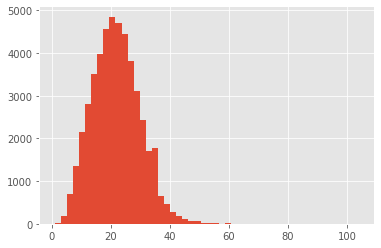

In [23]:
### Checking distribution of sentences length
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [24]:

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

max_len = 50

X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences = X, padding='post', value=num_words-1)

y = [[tag2idx[w[2]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences = y, padding='post', value= tag2idx["O"])
y = [to_categorical(i, num_classes=num_tags) for i in y]


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state= 1)

In [26]:
### Build and Compile a Bidirectional LSTM Model

In [27]:
from tensorflow.keras import Model,Input
from tensorflow.keras.layers import LSTM,Embedding,Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D,Bidirectional

In [28]:
input_word = Input(shape=(max_len,))
model = Embedding(input_dim=num_words,output_dim=max_len,input_length=max_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100,return_sequences=True,recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(num_tags,activation='softmax'))(model)
model = Model(input_word,out)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 50, 50)            1758950   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 50)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 200)           120800    
_________________________________________________________________
time_distributed (TimeDistri (None, 50, 17)            3417      
Total params: 1,883,167
Trainable params: 1,883,167
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer = 'adam',
              loss='categorical_crossentropy',
             metrics=['accuracy'])

In [30]:
#### Train the model 

In [31]:
!pip install livelossplot

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback

In [33]:
import gc
gc.collect(),gc.collect()

(0, 0)

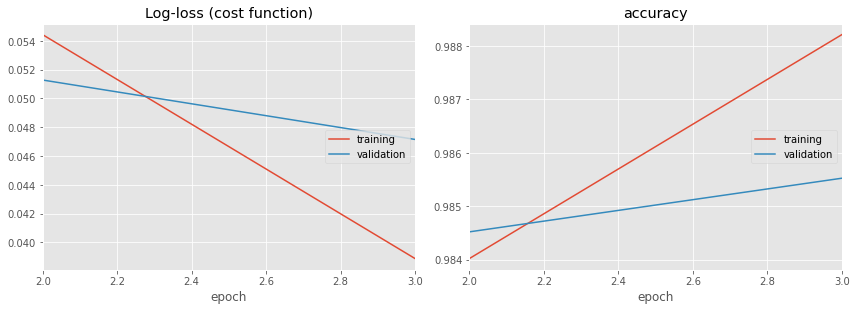

Log-loss (cost function):
training   (min:    0.039, max:    0.191, cur:    0.039)
validation (min:    0.047, max:    0.071, cur:    0.047)

accuracy:
training   (min:    0.956, max:    0.988, cur:    0.988)
validation (min:    0.980, max:    0.986, cur:    0.986)
34530/34530 [==============================] - 150s 4ms/sample - loss: 0.0389 - accuracy: 0.9882 - val_loss: 0.0472 - val_accuracy: 0.9855


In [34]:
early_stopping = EarlyStopping(monitor='val_accuracy',patience=1, verbose=0, mode='max',restore_best_weights= False)
callbacks = [PlotLossesCallback(),early_stopping]

history = model.fit(X_train,np.array(y_train),validation_split = 0.2,
                   batch_size = 32, epochs = 3, verbose=1,callbacks=callbacks)

In [35]:
### Evaluate Named Entity Model

In [36]:
model.evaluate(X_test, np.array(y_test))

4796/4796 [==============================] - 3s 575us/sample - loss: 0.0494 - accuracy: 0.9852


[0.049372312995769066, 0.9851835]

In [37]:
i = np.random.randint(0, X_test.shape[0])
p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)

y_true = np.argmax(np.array(y_test), axis=1)[i]
print("{:15}{:5}\t {}\n".format("Word","True","Pred"))
print("_"*30)
for W, true, pred in zip(X_test[i],y_true,p[0]):
    print("{:15}{}\t{}".format(words[W-1],tags[true],tags[pred]))


Word           True 	 Pred

______________________________
The            I-eve	O
Sudanese       B-gpe	B-gpe
government     B-gpe	O
has            B-gpe	O
welcomed       B-gpe	O
the            B-gpe	O
Chinese        B-gpe	B-gpe
mission        B-gpe	O
to             B-gpe	O
Darfur         B-gpe	B-geo
.              B-gpe	O
pro-Tibetan    B-gpe	O
pro-Tibetan    B-gpe	O
pro-Tibetan    B-gpe	O
pro-Tibetan    B-gpe	O
pro-Tibetan    B-gpe	O
pro-Tibetan    B-gpe	O
